# What is PCA?

PCA is a way to bring out strong pattern within a complex dataset (with a large numebr of dimensionals and observations). It has been widely applied in chemical and biological engineering. 

Here, I would introduce an example using PCA to analyse the most important gene that controls a feature expression within mouse to introduce the basic principle of PCA (Part 1). 

Then, I will introduce the corresponding python library that contains PCA codes for data analysis (Part 2). 

Finally, I will introduce the application of PCA in sweat metabolite analysis that has been reported from a journal article (Part 3).

**Part 1**
Imagine, if you are measuring 15 gene expression of 60 mice, the data would be a 15*60 table (15 features --> 15 dimensions, impossible to visualize it!). You must be curious:
How does one know which mice are similar to another? 
How does one know which genes are responsible for such similarities or differences?

PCA has the ability to "smoosh" the higher dimension (15 dimensions) into lower dimensions (such as 2D or 3D), so that each observation can be represented in one dot on coordinates, then, as expected, similar dots would cluster together with the most similarities. The lower dimensions are called Principle Components (PC).

But how to "smoosh" the data? How to select PC and based on what?
PCA achieves this by capturing the the essence of data into a few PCs (let's assume PC1 and PC2), which means that PC1 and PC2 should be able to describe the most variances of data.

Mathematically, this process can be described as:
Find a function/Operation G,to map x ∈ R^d to z ∈ R^p, p<<d. z = Gx.
The matrix G consisting of the first p eigenvectors of the covariance matrix S solves the following min problems:
min_G∈R^(d*p)||X - G(G^T*X)||_F^2, subject to G*G^T=I_p.
Note: ||X - G(G^T*X)||_F^2 = ||X - X^-||_F^2, refers to reconstruction error.

The above math indicates that the PC1 should be capable of minimizing the total projection distances from each point to the new PC1 coordinate. 

Let's imagine there are two genes and we are going to project the 2D data into 1D data while maintaining the most features of the 2D data. This process can be visualized in the following figure:
In X plane, PC1 Z1 is fitted by the minimum projection distances.

Source: Liu, J. M., (2022 April 56-57) IS6400 Business Data Analytics City University of Hong Kong.

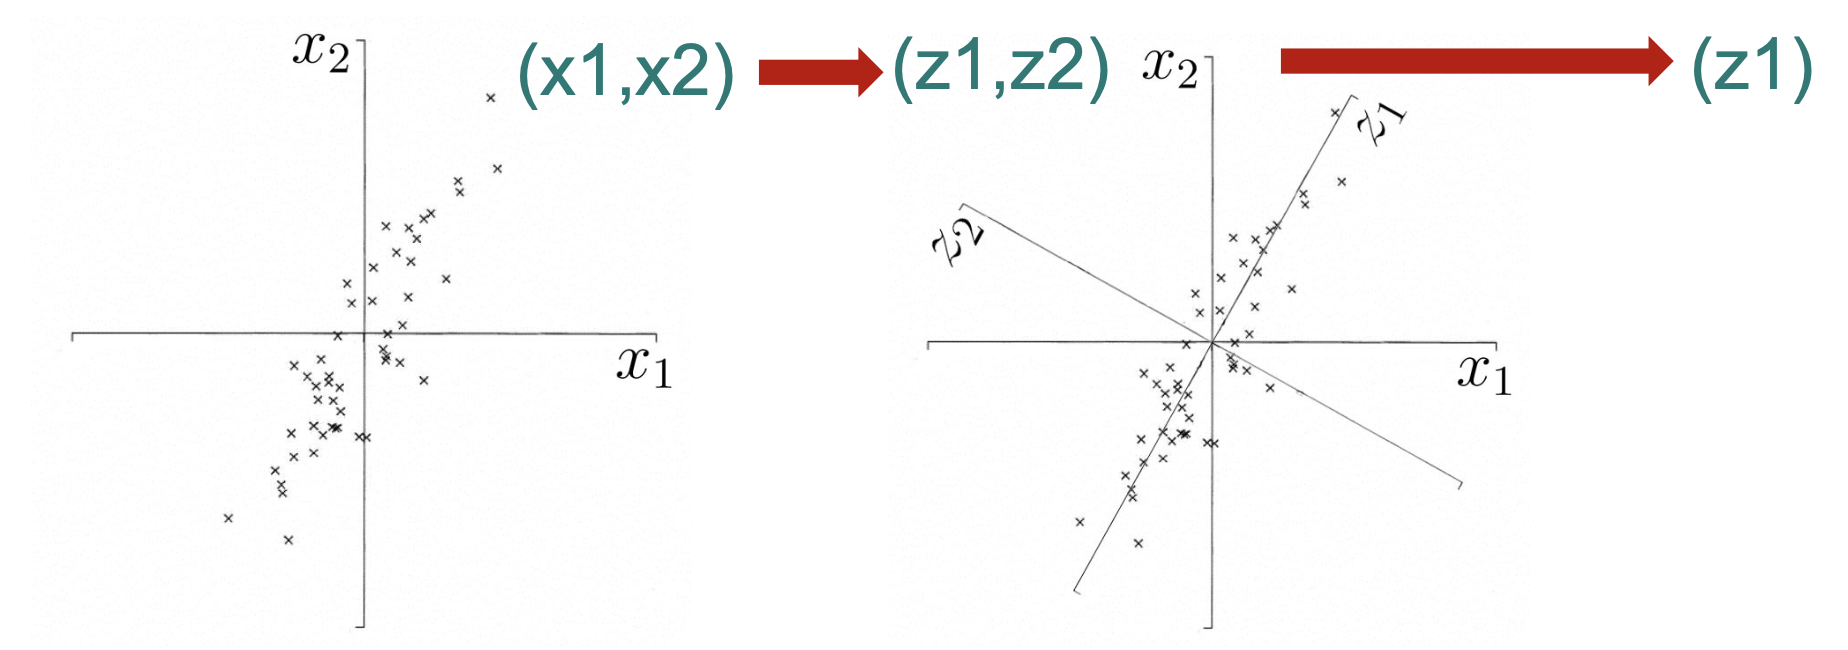

More specifically, for 2D to 1D, we must find a vector u(1), onto which you can project your data so as to minimize the projection error. Recursively speaking, to reduce n dimensions to k dimensions, we need to find k vectors (u(1), u(2), ... u(k)) onto which the projection error can be minimized.

We can regard (u(1), u(2), ... u(k)) as new planes/directions, we still need to project each feature into this new planes/directions, thus along each u(i), we can create another vector called z(i).

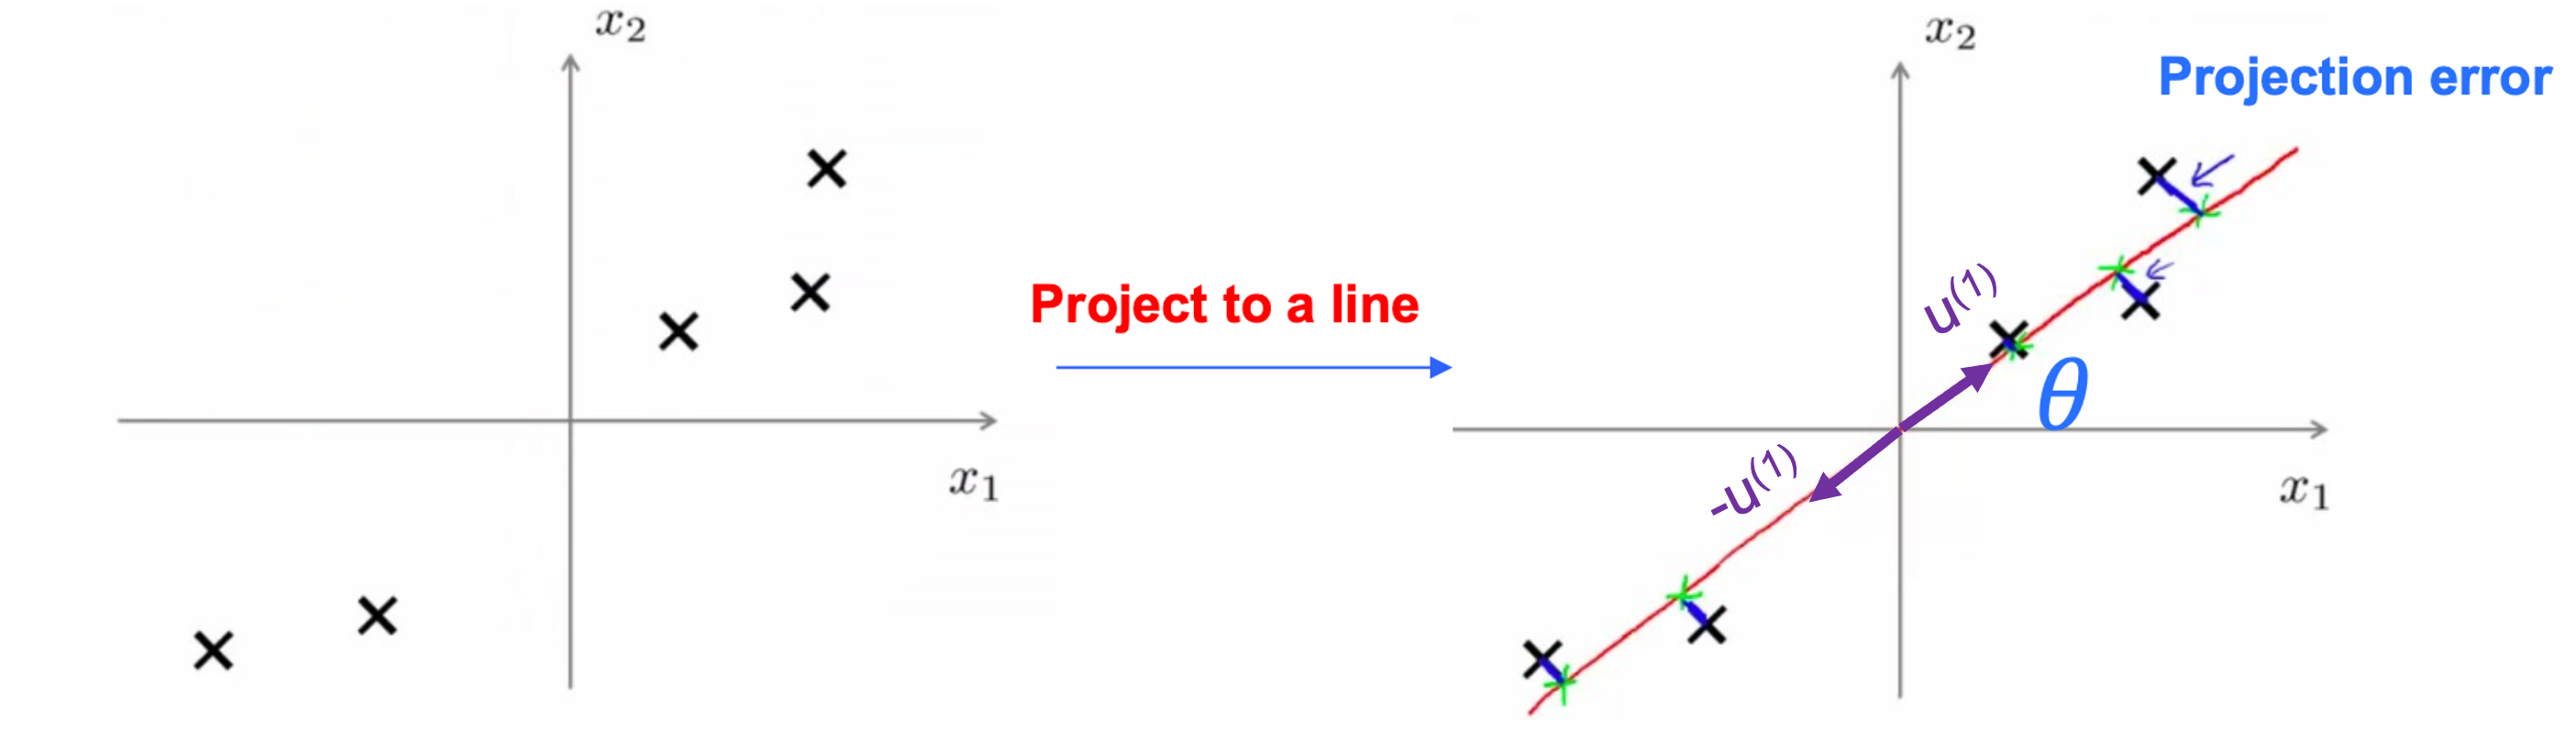

Therefore, we need to compute two things in total: 
1. Compute the u vectors --> the new planes/directions.
2. Compute the z vectors --> the new, lower dimensional feature vectors.

Go back to the mice and genes: 
Based on the above description, we should be able to know that each feature has a weight on each PCj and each mouse i has series of gene expressions. These can be written as:
For mouse #i:
Xi = [gene1, gene2, gene3,..., gene15]
For eigenvector #j (PCj):
Nj = [nj1, nj2, nj3,..., nj15]

Therefore, the PCj of sample #i:
PCji = Xi*Nj^T

Based on this principle, we can project all the 15 features into 2 PCs and visualize it in 2D coordinator to see clustering result.

Reference: https://blog.bioturing.com/2018/06/14/principal-component-analysis-explained-simply/

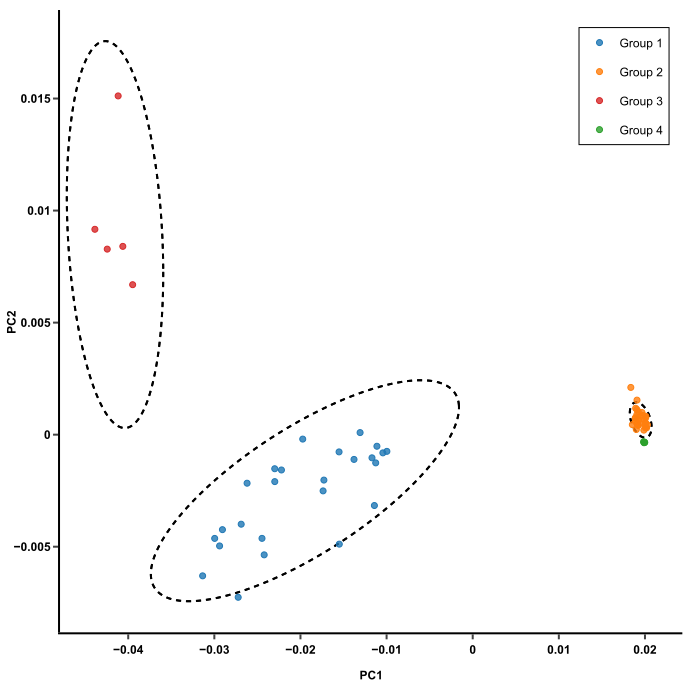

One should also be clear about when to use PCA for data analysis. It should be noted that PCA is worthy if the top 2 or 3 PCs cover most of the variation in your data. Otherwise one should consider to other feature engineering method.

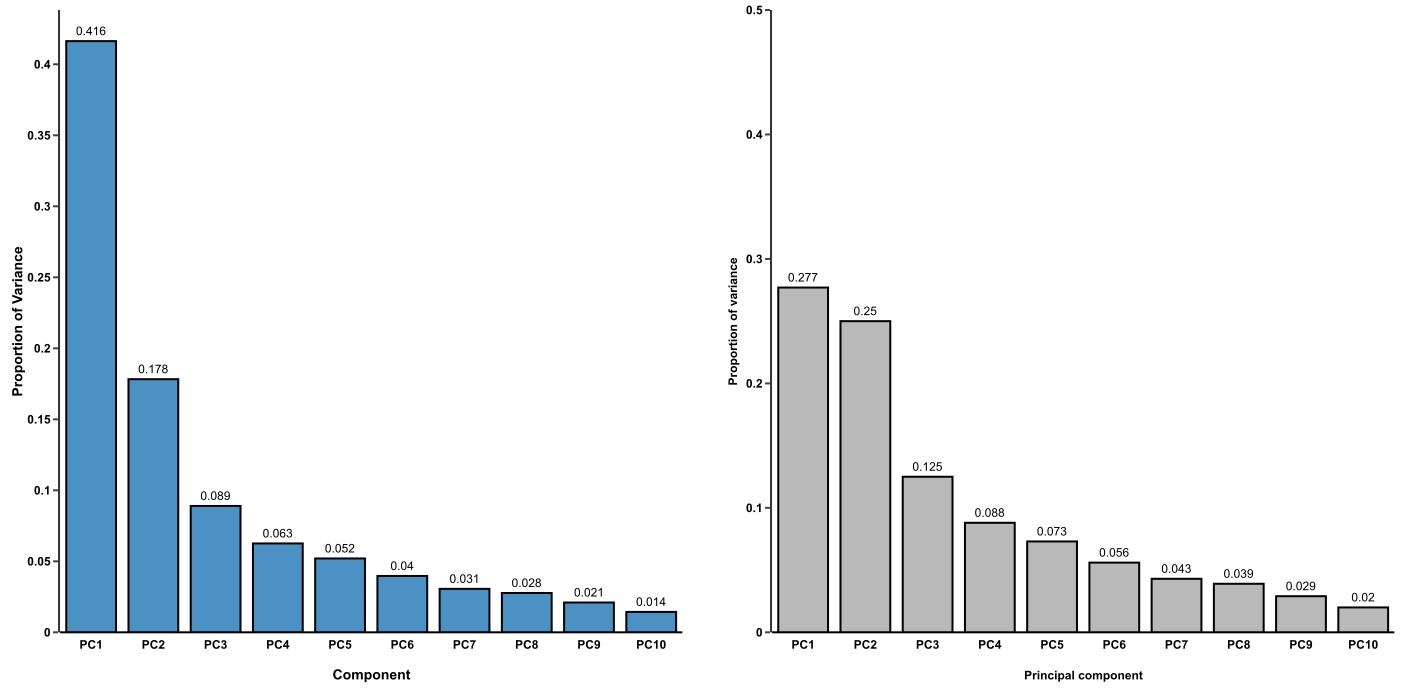

**Part 2**
Python library in PCA is sklearn.decomposition.PCA

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
import numpy as np
from sklearn.decomposition import PCA

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [3]:
pca.n_features_

2

In [4]:
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [5]:
print(pca.singular_values_)

[6.30061232 0.54980396]


**Part 3**
PCA can be used in sweat component anaysis. By adding another label (such as gender or time), the following article utilises PCA to analyse the sweat component difference 1. between male and female, 2. across different time slots.

Title: Comprehensive and Quantitative Profiling of the Human Sweat Submetabolome Using High-Performance Chemical Isotope Labeling LC−MS
Reference: Anal. Chem. 2016, 88, 7378−7386, DOI: 10.1021/acs.analchem.6b01930


In this article, people use High-Performance Chemical Isotope Labeling LC–MS method to detect metabolites within sweat. Through this method, people have identified 3130 peak pairs which indicate there may be a total of 3130 number metabolites. Some of them have been used to do multivariate analysis.

1. Sweat component difference between male and female
In order to detect the major metabolite concentration differences between male and female, they've selected a total of 1262 peak pairs for multivariate analysis in comparing the sweat samples collected from males and females, the PCA plot is shown like this:

This plot clearly shows that major sweat metabolites of Female and Male has a large variation in the second principal component. The secondary principal component may be contributed primarily by some motabolites, which indicate the metabolite concentration difference in the sweat of female and male.

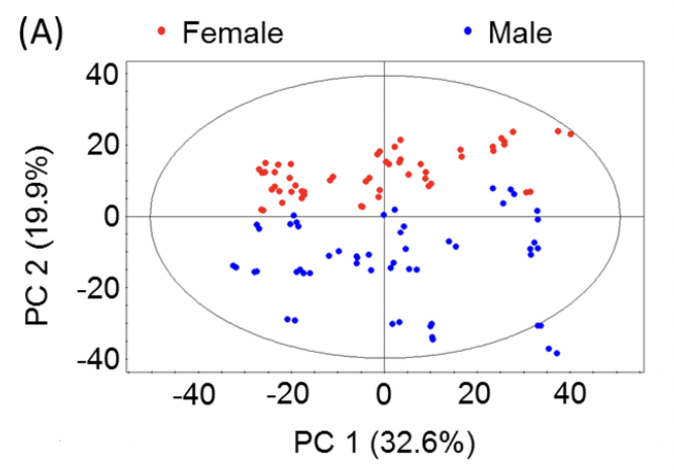